In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pyaudio
p = pyaudio.PyAudio()

FORMAT = pyaudio.paInt16
#RATE = 22050
RATE = 16000
CHUNK = 1024
CHANNELS = 1

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

RECORD_SECONDS = 5
frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
  data = stream.read(CHUNK)
  frames.append(data)

stream.stop_stream()
stream.close()
p.terminate()

In [5]:
p = pyaudio.PyAudio()
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                output=True,
                frames_per_buffer=CHUNK)
for f in frames:
  stream.write(f)
stream.close()
p.terminate()

(109568,)
torch.Size([1, 80, 429])


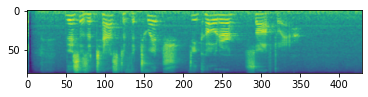

In [9]:
waveform = np.frombuffer(b''.join(frames), np.int16)/32768
print(waveform.shape)

import torch
import torchaudio
transform = torchaudio.transforms.MelSpectrogram(22050, n_fft=1024, win_length=1024, hop_length=256, n_mels=80)
mel_specgram = transform(torch.tensor(waveform[None]).type(torch.float32))
print(mel_specgram.shape)
imshow(np.log10(mel_specgram[0]))

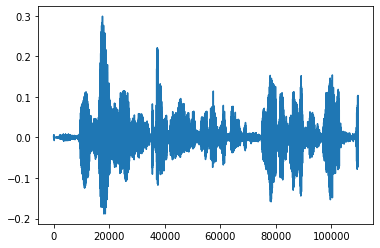

In [22]:
plot(waveform)

In [2]:
from rec import Rec
import torch
model = Rec()
model.load_state_dict(torch.load('demo/tinyvoice_1652496951_20.pt', map_location=torch.device('cpu')))

<All keys matched successfully>

In [3]:
from rec import load_example, CHARSET
from preprocess import to_text
model.eval()
val = load_example('data/LJ037-0171.wav')
fake_val = mel_specgram[0].T
imshow(torch.concat([torch.log10(val).T, torch.log10(fake_val).T], axis=1))
mguess = model(fake_val[:, None])
print(mguess.shape)
#print(mguess[:, 0, :].argmax(dim=1))
pp = to_text(mguess[:, 0, :].argmax(dim=1).cpu().numpy())
print(pp)

NameError: name 'mel_specgram' is not defined

In [31]:
fake_val.max()

tensor(676.9926)